# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
    'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'
]

data = pd.read_csv('data.csv', names=column_names)

In [3]:
sex_mapping = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}

data['Sex'] = data['Sex'].map(sex_mapping)

1. Using the Pandas package, create a table of the distribution of the qualitative variable.

In [4]:
qualitative_counts = data['Sex'].value_counts()
qualitative_percentage = (qualitative_counts / qualitative_counts.sum()) * 100

distribution_table = pd.DataFrame({
    'count': qualitative_counts,
    '%': qualitative_percentage.round(2)
})
distribution_table.index.name = None
distribution_table

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset

In [5]:
quantitative_data = data.select_dtypes(include=[np.number])

summary_stats = quantitative_data.describe(percentiles=[0.25, 0.5, 0.75]).T
summary_stats = summary_stats.drop(columns=['count'])

summary_stats

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

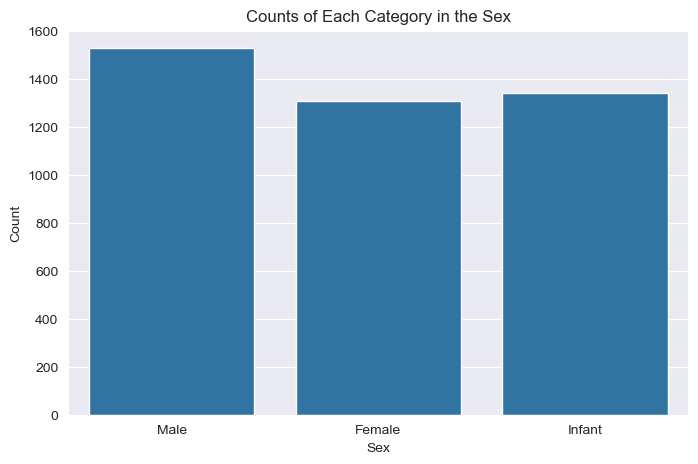

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=data)
plt.title("Counts of Each Category in the Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.

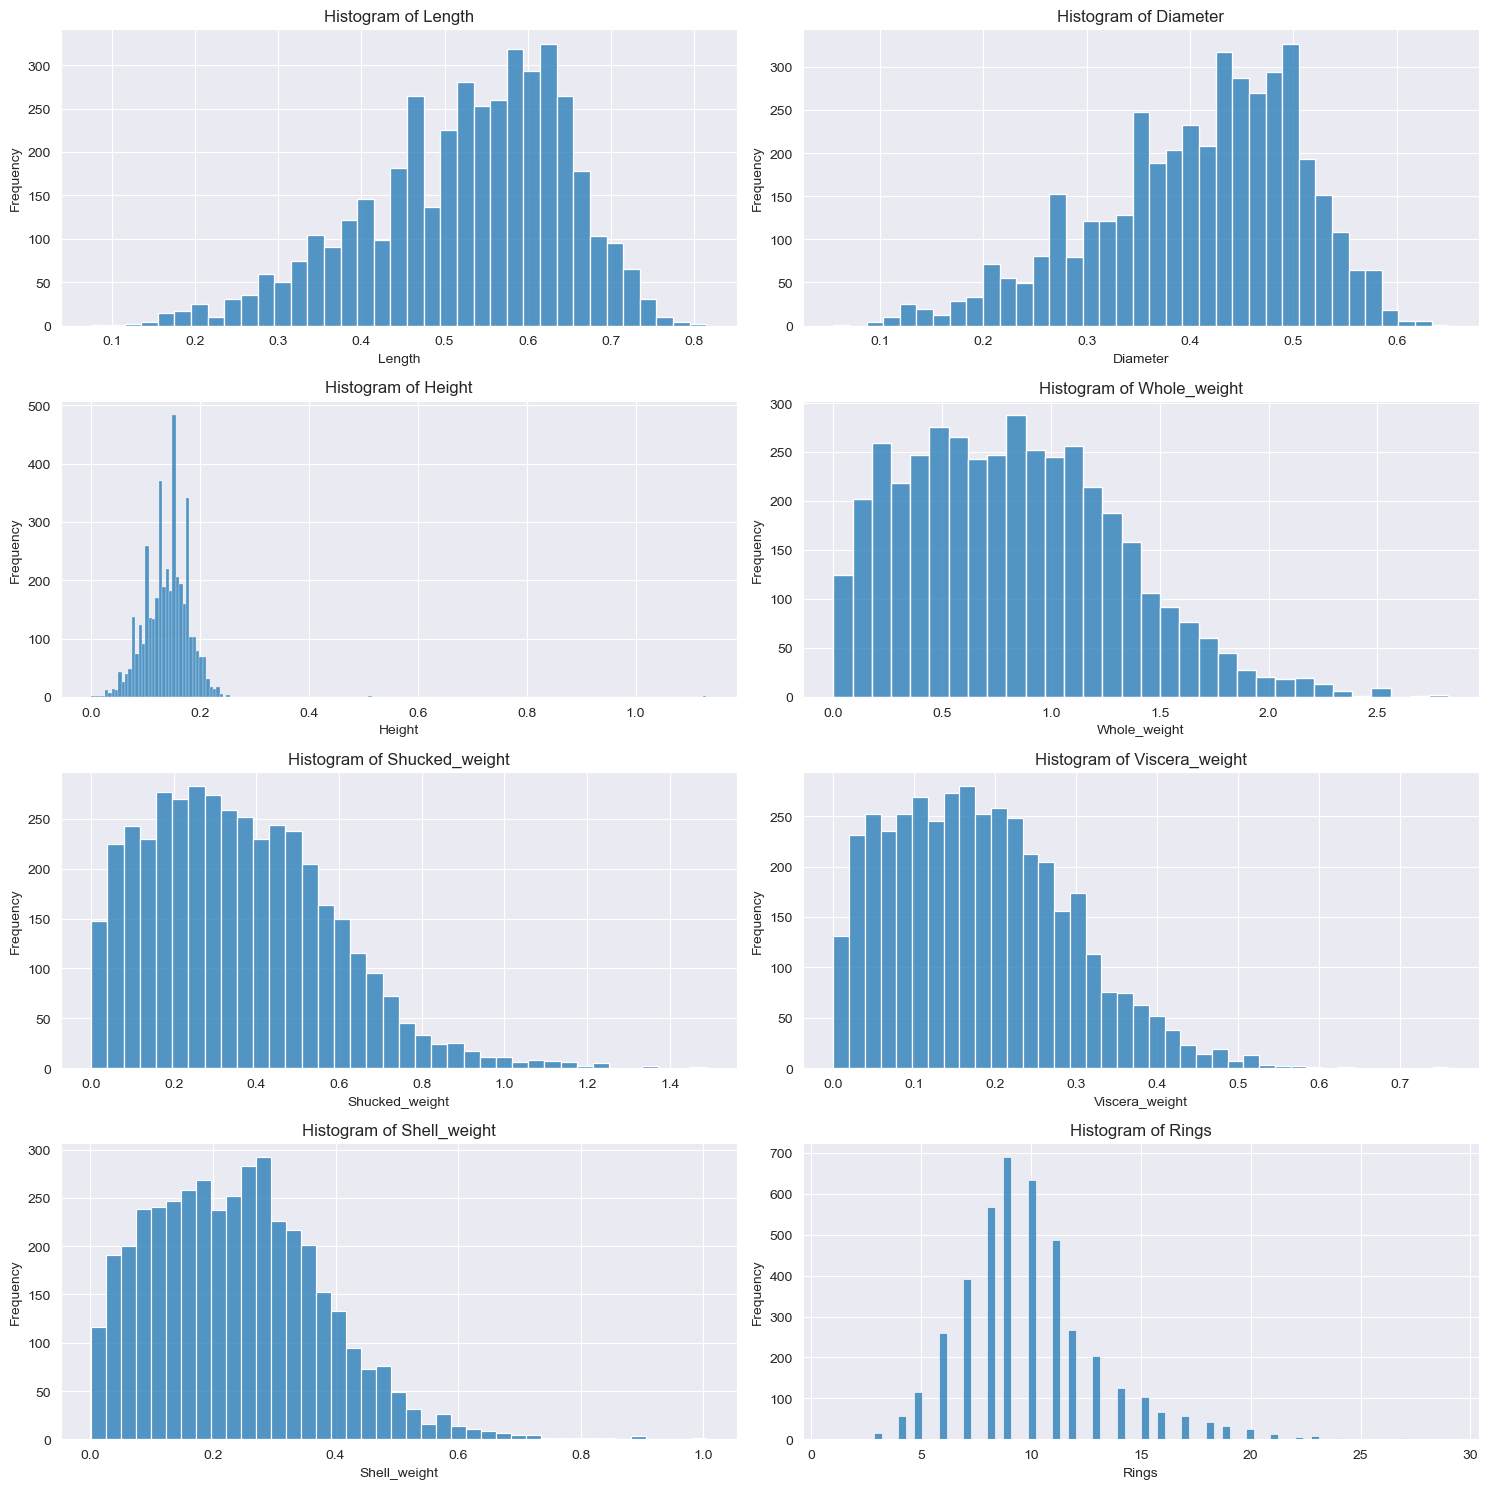

In [7]:
quantitative_columns = quantitative_data.columns
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(quantitative_columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

5. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

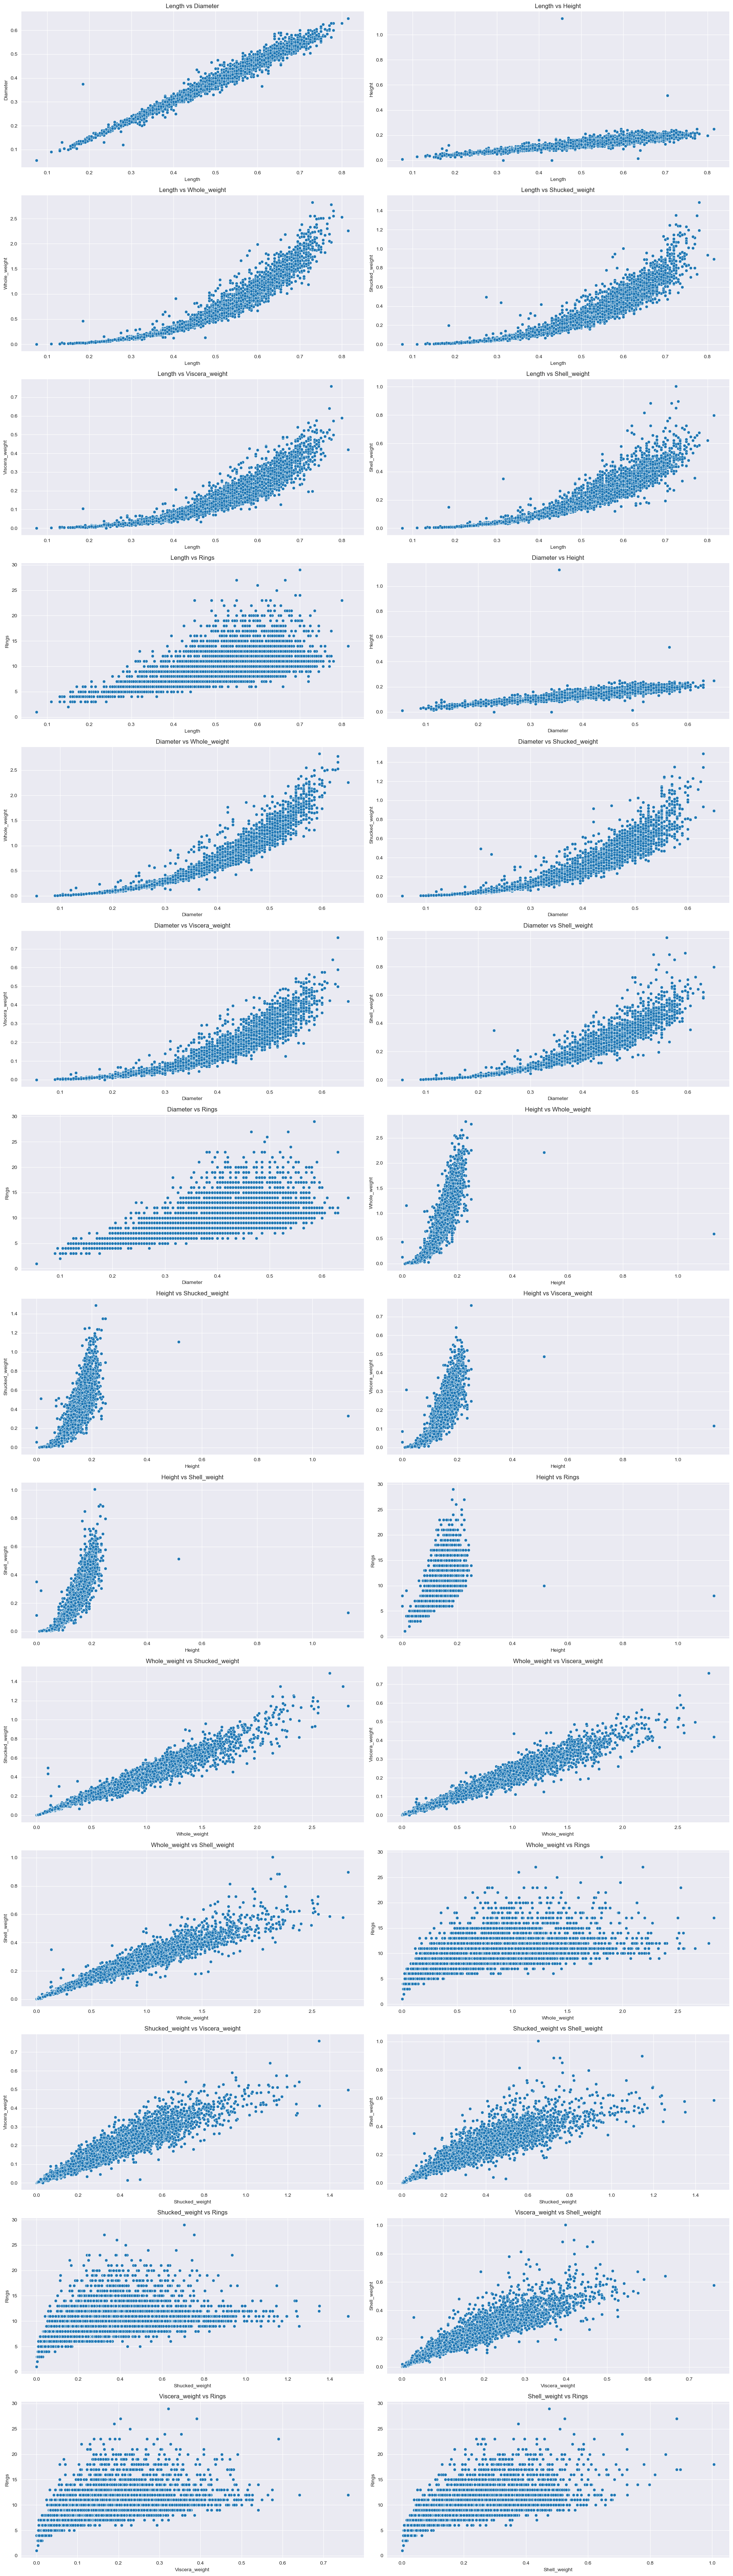

In [8]:
quantitative_columns = quantitative_data.columns

fig, axes = plt.subplots(14, 2, figsize=(20, 70))
axes = axes.flatten() 

for i, (var1, var2) in enumerate(itertools.combinations(quantitative_columns, 2)):
    sns.scatterplot(x=quantitative_data[var1], y=quantitative_data[var2], ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6. Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [9]:
correlation_matrix = quantitative_data.corr()


correlation_matrix

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


7. Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

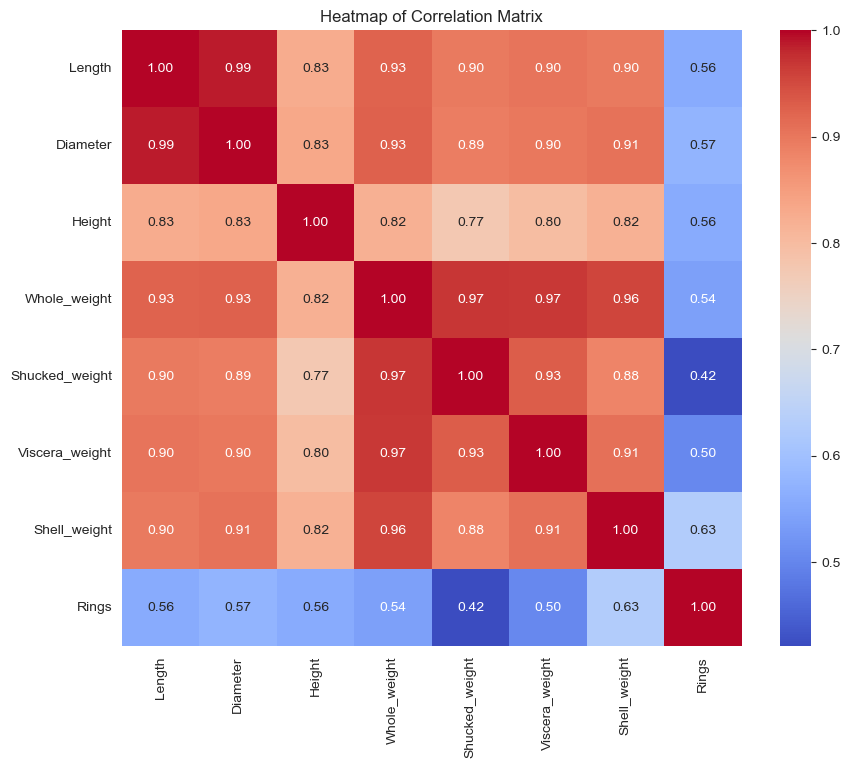

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()

8. Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).

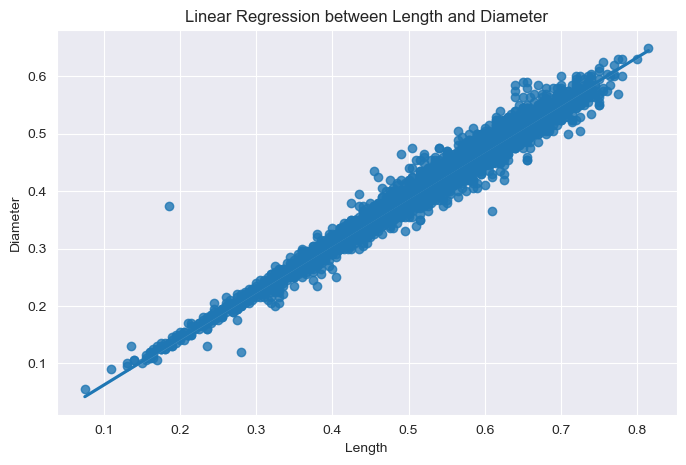

In [11]:
corr_pairs = correlation_matrix.unstack()
strongest_pair = corr_pairs[corr_pairs != 1].idxmax()
var1, var2 = strongest_pair

plt.figure(figsize=(8, 5))
sns.regplot(x=var1, y=var2, data=quantitative_data)
plt.title(f"Linear Regression between {var1} and {var2}")
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()